In [2]:
import numpy as np
import matplotlib.pyplot as plt

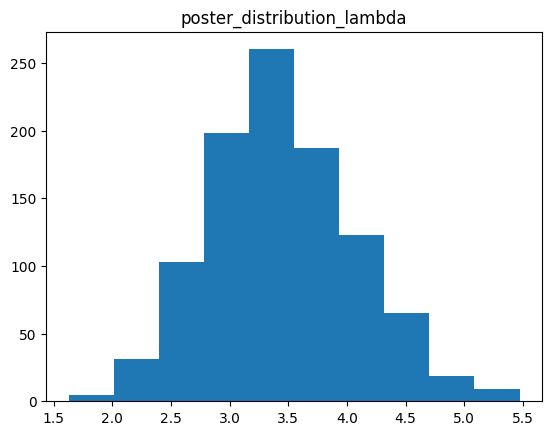

In [4]:
X = np.array([3, 2, 2, 4, 4, 6, 4, 5]) # 2011 - 2018年の間に本州に上陸した台風の数
# 観測データがポアソン分布に従うとする。
# パラメータの事前分布をexp(1)の指数分布とする。
# p(Θ|X) -> p(X|Θ)p(Θ) -> Θ^{\sum x_n} exp(-(N+1)Θ)
# これはガンマ分布のG(\sum x_n + 1, 1/N+1)に従う

theta_hat_sample = np.random.gamma(sum(X)+1, 1/(len(X)+1), size=1000)
plt.figure()
plt.hist(theta_hat_sample)
plt.title('poster_distribution_lambda')
plt.show()

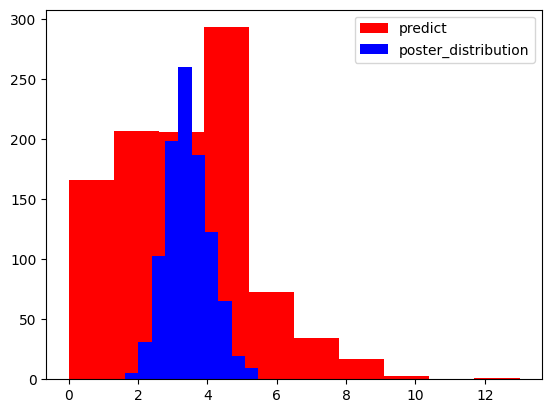

In [8]:
# 予測分布
# p(x*|X) = \int_Θ p(x*|Θ)p(Θ|X) dΘ
# x*|X ~ NB(n, p)
# n = α = \sum x_n +1
# p = β/(β+1) = (N+1)/(N+2)

alpha = sum(X) + 1
beta = len(X) + 1
p = beta/ (beta+1)

#事後予測分布
x_star = np.random.negative_binomial(alpha, p, size =1000)
plt.figure()
plt.hist(x_star, color='red', label='predict',density=True)
plt.hist(theta_hat_sample, color='blue', label = 'poster_distribution', density=True)
plt.legend()
plt.show()
# 予測分布は、現在の不確実性に加えて、未来の不確実性も含まれるため、事後分布に比べると不確実性が高いことがわかる